Walmart Project

In [1]:
# importing basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading the dataset
df = pd.read_csv("Walmart DataSet.csv")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
## dealing with null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df["Store"].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [7]:
## dealing with duplicates
df.duplicated().sum()

0

In [8]:
## converting object date to datetime format

df["Date"] = pd.to_datetime(df["Date"])



c:\Users\noahf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\noahf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\noahf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\noahf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
df2 = df.columns

In [11]:
df2

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
## Dealing with outliers

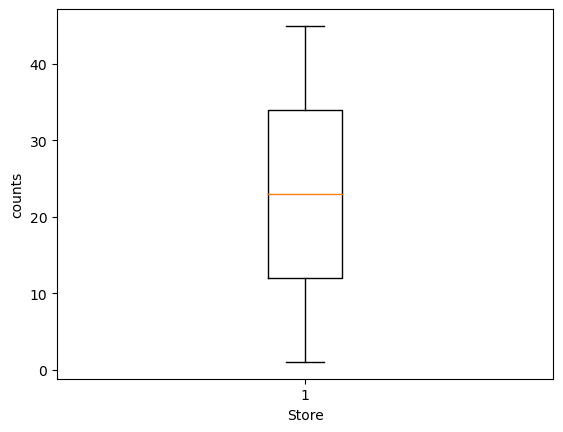

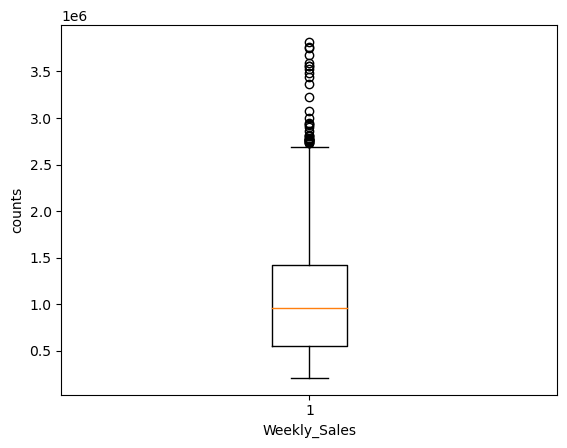

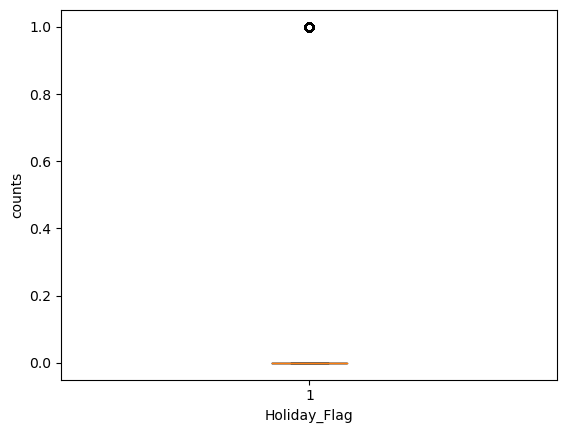

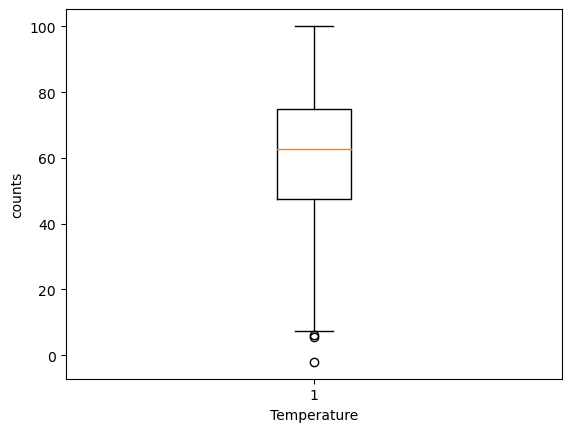

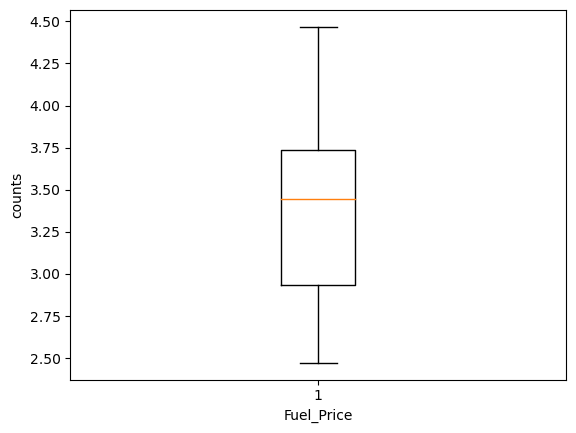

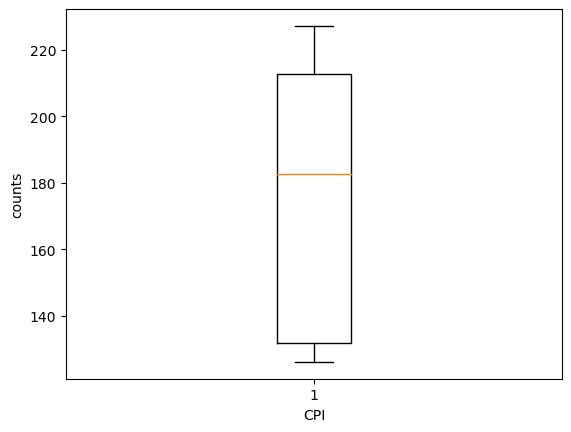

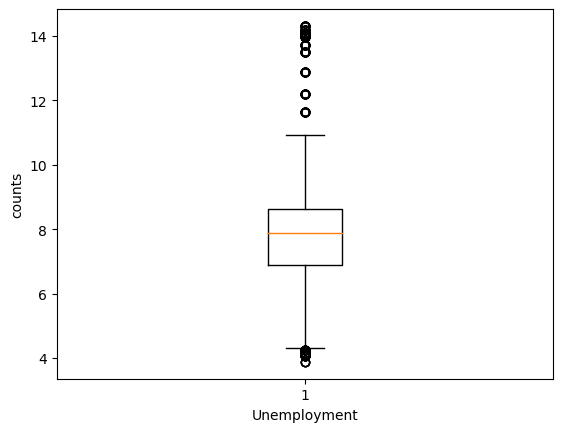

In [12]:
for i in df2:
  if df[i].dtypes != "datetime64[ns]":
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [14]:
out_cols = ['Weekly_Sales', 'Temperature', 'Unemployment']

In [ ]:
## Removal of outliers

In [15]:
for i in out_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]<=UL)&(df[i]>=LL)]

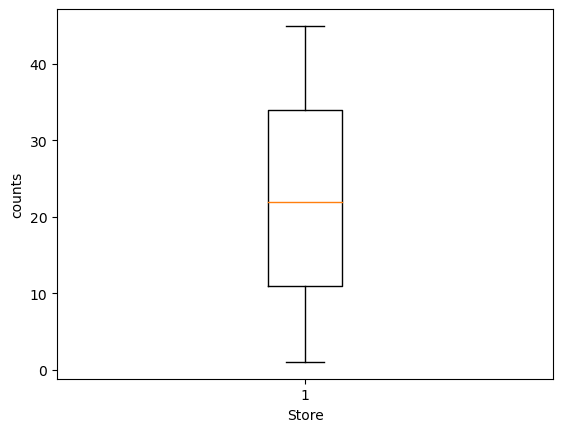

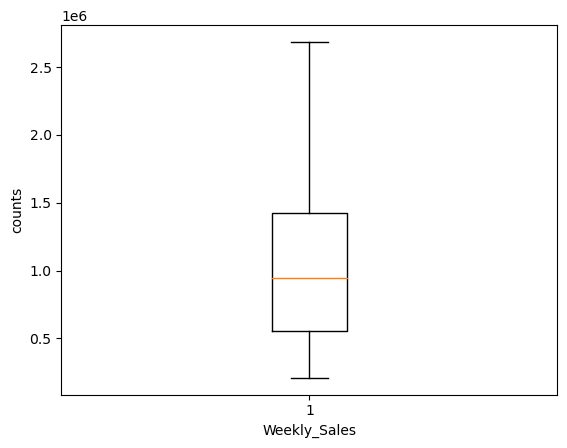

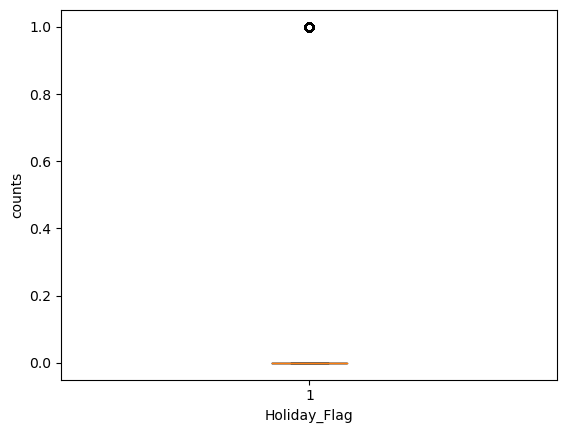

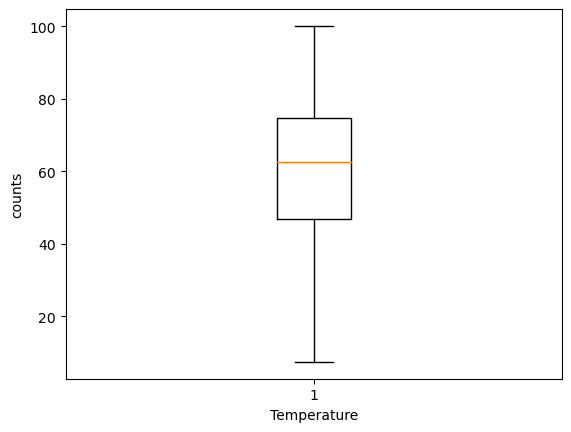

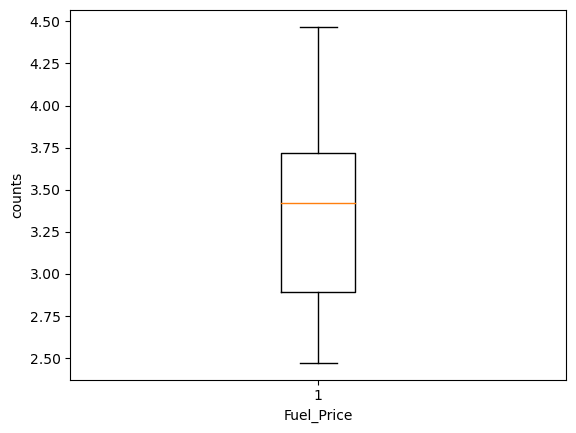

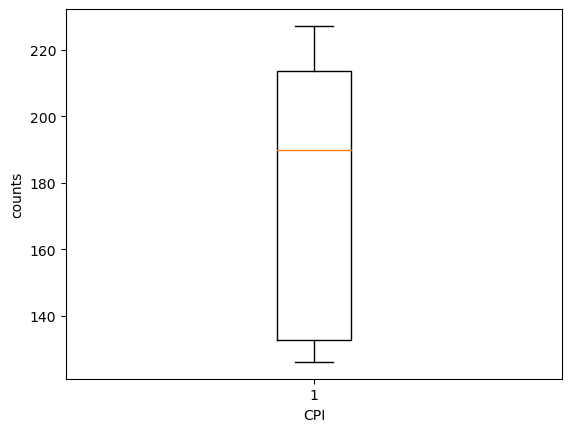

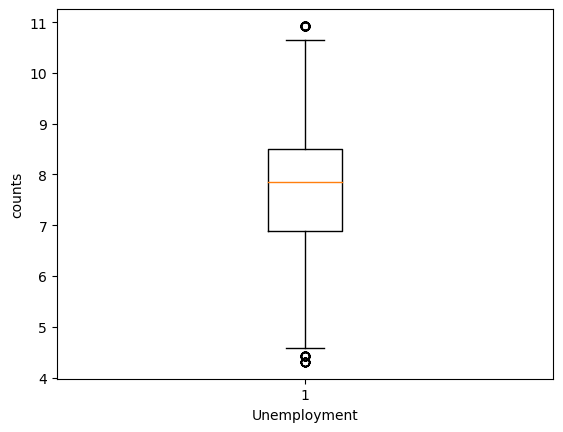

In [16]:
for i in df2:
  if df[i].dtypes != "datetime64[ns]":
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

In [ ]:
## Preparing the dataset for Forecasting

<AxesSubplot:>

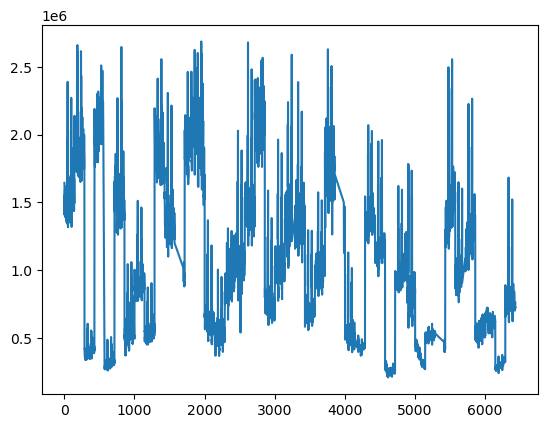

In [17]:
df['Weekly_Sales'].plot()

In [18]:
df["Sales_by_week"] = df['Weekly_Sales'].copy()

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_by_week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68


In [20]:
del df['Weekly_Sales']

In [21]:
df

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_by_week
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53


In [22]:
## Performing Time series Forcasting

In [23]:
df.set_index('Date', inplace= True)

In [24]:
df

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_by_week
Date,,,,,,,
2010-05-02,1,0,42.31,2.572,211.096358,8.106,1643690.90
2010-12-02,1,1,38.51,2.548,211.242170,8.106,1641957.44
2010-02-19,1,0,39.93,2.514,211.289143,8.106,1611968.17
2010-02-26,1,0,46.63,2.561,211.319643,8.106,1409727.59
2010-05-03,1,0,46.50,2.625,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...
2012-09-28,45,0,64.88,3.997,192.013558,8.684,713173.95
2012-05-10,45,0,64.89,3.985,192.170412,8.667,733455.07
2012-12-10,45,0,54.47,4.000,192.327265,8.667,734464.36


<AxesSubplot:xlabel='Date'>

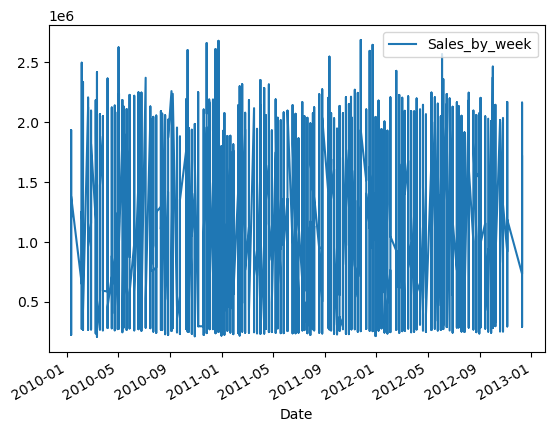

In [25]:
df.plot(y = 'Sales_by_week')

In [26]:
new_df = pd.DataFrame(df["Sales_by_week"])

In [27]:
new_df

,Sales_by_week
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


In [29]:
## checking if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [30]:
result = adfuller(new_df['Sales_by_week'])

In [31]:
pval = result[1]
pval

4.6604406538044436e-05

In [32]:
## 4.66 > 0.55 - it is not stationary

In [56]:
rolling_mean= new_df.rolling(window = 52).mean()

## here we are taking window size as 52 as there are 52 weeks in a year

In [57]:
rolling_mean

,Sales_by_week
Date,
2010-05-02,NaN
2010-12-02,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-05-03,NaN
...,...
2012-09-28,801817.922308
2012-05-10,801433.461154
2012-12-10,801693.410577


In [58]:
rolling_mean_detrended= new_df-rolling_mean

In [60]:
rolling_mean_detrended[:53]

,Sales_by_week
Date,
2010-05-02,NaN
2010-12-02,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-05-03,NaN
2010-12-03,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-02-04,NaN


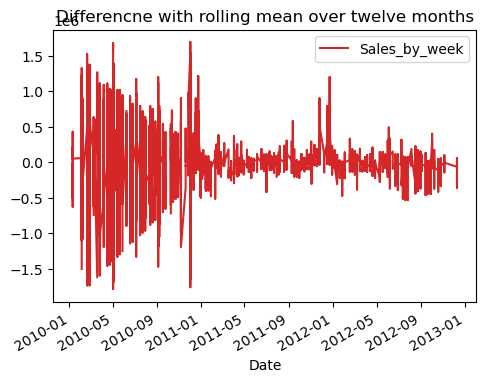

In [61]:
ax1 = plt.subplot(1, 2, 2)
rolling_mean_detrended.plot(figsize= (12, 4), color = 'tab:red', title= 'Differencne with rolling mean over twelve months', ax= ax1)

# ax2 = plt.subplot(1, 2, 2)
# new_df.plot(figsize= (12, 4), color = 'tab:red', title=  'original data', ax = ax2)

plt.show()

In [41]:
## Trying to remove seasonality

In [62]:
rolling_mean_detrended_diff = rolling_mean_detrended-rolling_mean_detrended.shift()

In [63]:
rolling_mean_detrended.shift()[:53]

,Sales_by_week
Date,
2010-05-02,NaN
2010-12-02,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-05-03,NaN
2010-12-03,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-02-04,NaN


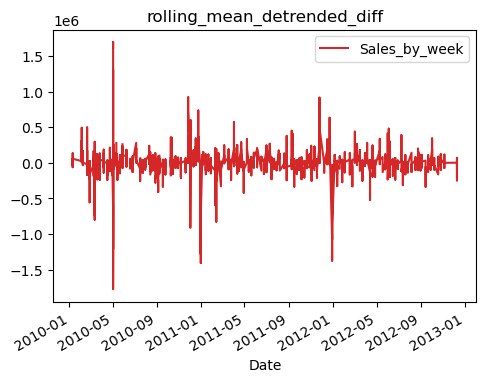

In [64]:
ax2=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red', title="rolling_mean_detrended_diff",ax=ax2)

plt.show()

In [65]:
rolling_mean_detrended_diff= rolling_mean_detrended_diff.dropna()

In [67]:
m=rolling_mean_detrended_diff.rolling(window = 53).mean()
s=rolling_mean_detrended_diff.rolling(window= 53).std()

In [69]:
%pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
from pmdarima import auto_arima

In [71]:
order = auto_arima(rolling_mean_detrended_diff['Sales_by_week'])

In [72]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5865
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -78049.482
Date:                Mon, 21 Aug 2023   AIC                         156110.965
Time:                        19:50:57   BIC                         156151.025
Sample:                             0   HQIC                        156124.892
                               - 5865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9761      0.032    -30.255      0.000      -1.039      -0.913
ar.L2         -0.7537      0.044    -17.196      0.000      -0.840      -0.668
ar.L3         -0.3576      0.011    -32.403      0.000      -0.379      -0.336
ma.L1          0.6163      0.035     17.756      0.000       0.548       0.684
ma.L2          0.3717      0.043      8.604      0.000       0.287       0.456
sigma2       2.11e+10      3e-12   7.03e+21      0.000    2.11e+10    2.11e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            133429.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.1e+36. Standard errors may be unstable.
"""

In [73]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

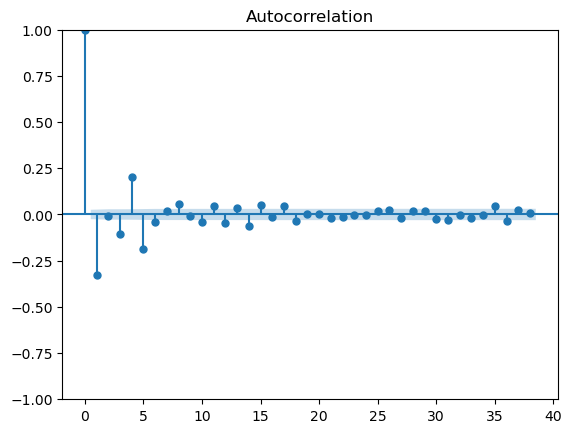

In [76]:
plot_acf(rolling_mean_detrended_diff);

c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


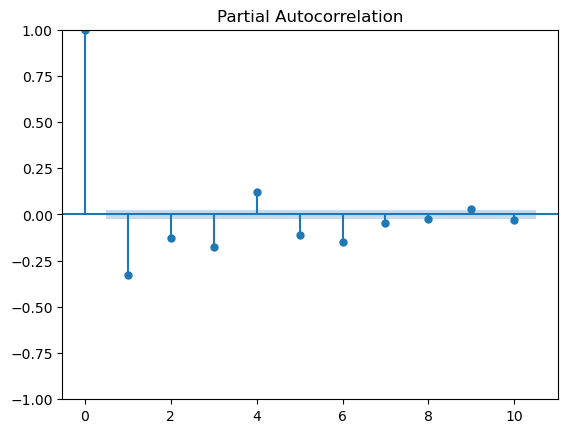

In [77]:
plot_pacf(rolling_mean_detrended_diff,lags=10);

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
train = rolling_mean_detrended_diff.iloc[:4000]['Sales_by_week']

In [80]:
test=rolling_mean_detrended_diff.iloc[4000:]['Sales_by_week']

In [81]:
## Building the model

model = ARIMA(train, order=(3, 0, 2))

c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-

In [82]:
# fit the data
model_fit = model.fit()

In [83]:
# predict
rolling_mean_detrended_diff['predict'] = model_fit.predict(start = len(train),  end = len(train) + len(test-1))
                                                        

c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

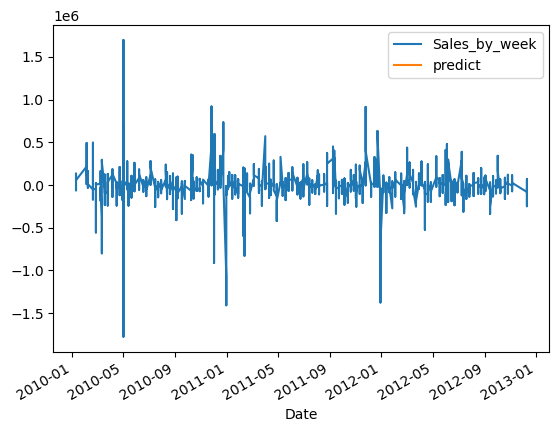

In [84]:
rolling_mean_detrended_diff[['Sales_by_week', 'predict']].plot()

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
model = SARIMAX(train,order = (3,0,2), seasonal_order=(3,0,2,52))
model = model.fit()

c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [87]:
rolling_mean_detrended_diff['pred']=model.predict(start=len(train), end=len(train)+len(test)-1)
                                                  

c:\Users\noahf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

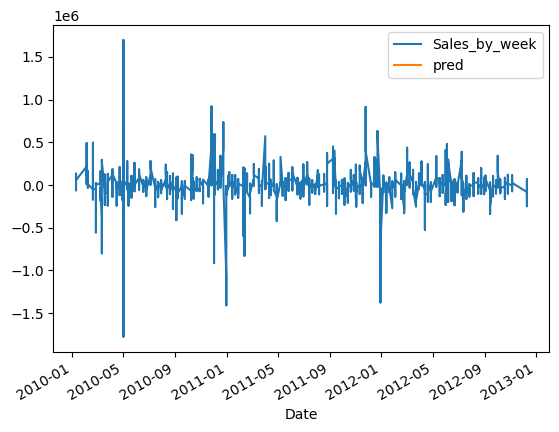

In [88]:
rolling_mean_detrended_diff[['Sales_by_week', 'pred']].plot()

In [90]:
# trying to forecast next 12 weeks with sarimax

forecast = model.forecast(steps = 60)
rolling_mean_detrended_diff.plot()
forecast.plot()